In [3]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.util import random_noise

from PIL import Image

In [4]:
to_gray = lambda img:np.sum(img.copy() * [.299,.587,.114], axis=-1)

In [5]:
img = Image.open('eri.jpeg')
img_g = to_gray(np.array(img)).astype(int)

In [6]:
def sp_noise(img, pr):
    img_ = img.copy()
    h, w = img_.shape
    mask = np.random.choice((0, 1, 2), size=(h, w), p=[(1 - pr), (pr) / 2., (pr) / 2.])
    img_[mask == 2] = 255 # salt noise
    img_[mask == 1] = 0 # 
    return img_

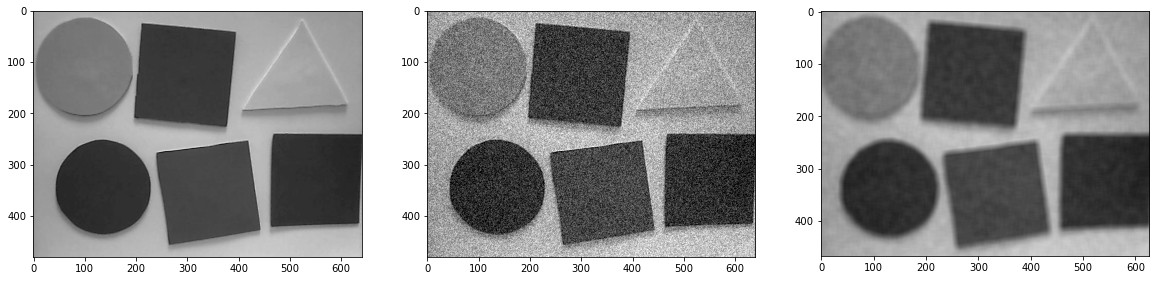

In [7]:
noise_level = 150

#noisy = sp_noise(img_g,0.2)
noisy = img_g + noise_level * (np.random.random(img_g.shape).astype(np.float32)-.5)


new_img = np.zeros(img_g.shape)

kernel_size = 13
filtering_n = 1

#Filtering

for k in range(filtering_n): 
    for i in range(noisy.shape[0]-kernel_size):
        for j in range(noisy.shape[1]-kernel_size):
            
            new_img[i+kernel_size,j+kernel_size] = np.mean(noisy[i:i+kernel_size,j:j+kernel_size])

new_img = new_img[kernel_size:,kernel_size:]
            
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(20, 20)
axs[0].imshow(img_g,cmap="gray", vmin=1, vmax=255)
axs[1].imshow(noisy,cmap="gray", vmin=1, vmax=255)           
axs[2].imshow(new_img,cmap="gray", vmin=1, vmax=255)
#axs[2].imshow([[255,0],[0,255]], vmin=0, vmax=255,cmap="gray")

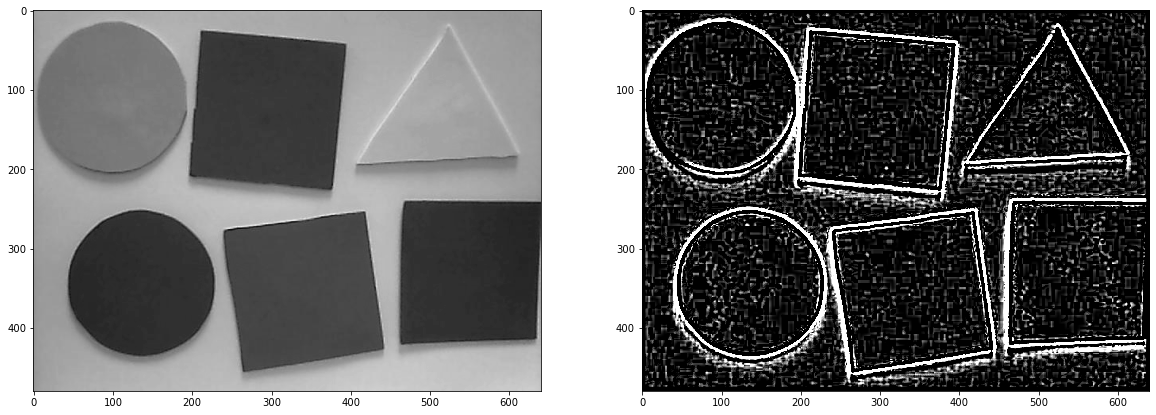

In [8]:
img_g = to_gray(np.array(img)).astype(int)

new_img = np.zeros((img_g.shape[0],img_g.shape[1]))

kernel_size = 9
filtering_n = 1

kernel = np.ones((kernel_size,kernel_size))
kernel *= -1
kernel[kernel_size//2,kernel_size//2] = kernel_size ** 2 - 1 


#Filtering

for k in range(filtering_n): 
    for i in range(img_g.shape[0]-kernel_size):
        for j in range(img_g.shape[1]-kernel_size):
            new_img[i+kernel_size//2,j+kernel_size//2] = np.sum(img_g[i:i+kernel_size,j:j+kernel_size]*kernel)

            
fig, axs = plt.subplots(1,2)
fig.set_size_inches(20, 20)
axs[0].imshow(img_g,cmap="gray", vmin=1, vmax=255)        
axs[1].imshow(new_img,cmap="gray", vmin=1, vmax=255)
#axs[2].imshow([[255,0],[0,255]], vmin=0, vmax=255,cmap="gray")